### Logistic Regression
- Data Prepration
- Visualisation
- Create Train & Test Set
- Create & Logistic Regression Model
- Predictions
- Dicision Boundary
- How to use sk-learn

In [31]:
# Data - Generate using numpy
import numpy as np 
import matplotlib.pyplot as plt

In [32]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)  ##It provides generalisaion of a normal distribution in higher dimension
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


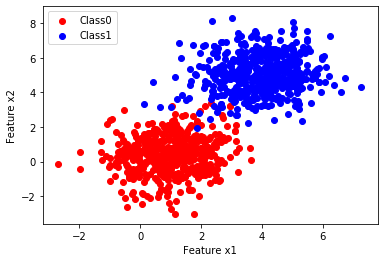

In [33]:
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label = "Class0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue', label="Class1")
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [34]:
y1 = np.zeros((500,1))
y2 = np.ones((500,1))
Y = np.concatenate((y1,y2))
print(Y.shape)

(1000, 1)


In [35]:
X = np.concatenate((dist_01,dist_02))
print(X.shape)

(1000, 2)


In [36]:
data = np.hstack((X,Y))
print(data.shape)

(1000, 3)


In [37]:
#Randomally shuffle the data
np.random.shuffle(data)
print(data[:10])

[[ 5.51099452  6.56759776  1.        ]
 [ 0.06554306  0.5905791   0.        ]
 [ 0.14722299  1.00883713  0.        ]
 [ 4.70036258  5.30891513  1.        ]
 [ 3.23207352  5.75060234  1.        ]
 [ 1.11454332  1.18814176  0.        ]
 [ 0.55404618 -1.08312126  0.        ]
 [ 1.63039565  0.79323943  0.        ]
 [-0.24091545 -0.45716497  0.        ]
 [ 2.1191956   1.11023023  0.        ]]


In [38]:
#Divide the data into train and test part
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


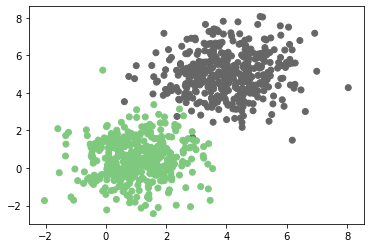

In [9]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap = plt.cm.Accent)
plt.show()

In [10]:
#Normalisation
mean = X_train.mean(axis=0) #To find the mean of all the values in the rows
std = X_train.std(axis=0)
X_train = (X_train-mean)/std

X_test = (X_test-mean)/std #We apply the same normalisation to training data also 
#We do not use mean and std of X_test because we have to shift the X_test data by the same amount as we did in the train data

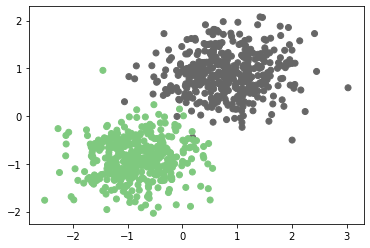

In [11]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap = plt.cm.Accent)
plt.show()

### Logistic Regression Implementation 

In [12]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    """
    X-entire array (m,n+1)
    theta - np.array(n+1,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):
    """
    params
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    
    return: scale_value = loss
    """
    hi =hypothesis(X,theta)
    error = -1*np.mean((y*np.log(hi) + (1-y)*np.log(1-hi)))
    return error/X.shape[0]
    

In [13]:
def gradient(X,Y,theta):
    """
    params
    X - (m,n+1)
    y - (m,1)
    theta - (n+1,1)
    
    return: gradient_vector - (n+1,1)
    """
    hi = hypothesis(X,theta)
    grad = -np.dot(X.T,Y-hi)
    return grad/X.shape[0]
    
def gradientDescent(X,Y,lr=0.1,max_itr=500):
    m,n = X.shape
    theta = np.zeros((n,1))
    error_list = []
    
    for i in range(max_itr):
        err = error(X,Y,theta)
        error_list.append(err)
        
        grad = gradient(X,Y,theta)
        
        #update
        theta = theta - lr*grad
        
    return theta,error_list

In [14]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))
print(X_train.shape)

Y_train = Y_train.reshape((-1,1))

(800, 3)


In [15]:
theta,error_list = gradientDescent(X_train,Y_train)
print(theta)

[[0.08437043]
 [2.13499567]
 [2.94962139]]


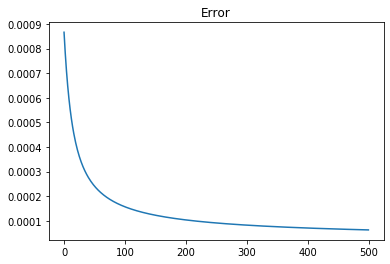

In [16]:
plt.plot(error_list)
plt.title("Error")
plt.show()

### Visualise Decision Surface

In [17]:
x1 = np.arange(-3,4)

x2 = -(theta[0] + theta[1]*x1)/theta[2]

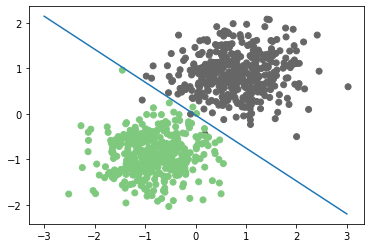

In [18]:
plt.scatter(X_train[:,1],X_train[:,2],c=Y_train.reshape((-1,)),cmap = plt.cm.Accent)
plt.plot(x1,x2)
plt.show()

### Predictions &accuracy 

In [19]:
one = np.ones((X_test.shape[0],1))
X_test = np.hstack((one,X_test))
print(X_test.shape)
print(X_test[:3,:])

(200, 3)
[[ 1.          1.61814629  1.38186803]
 [ 1.          0.27138273  1.11258817]
 [ 1.         -0.05117223 -0.48404887]]


In [20]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    
    return output

pred_train = predict(X_train,theta)
pred_test = predict(X_test,theta)
print(pred_train.shape,pred_test.shape)

(800, 1) (200, 1)


In [23]:
def accuracy(actual,prediction):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual==prediction)/actual.shape[0]
    
    return acc*100

In [24]:
train_acc = accuracy(Y_train,pred_train)
test_acc = accuracy(Y_test,pred_test)
print(train_acc)
print(test_acc)

99.375
99.0


## Using Sk-Learn

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train,Y_train)

C:\Users\nikhil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
theta_0 = model.intercept_
theta_s = model.coef_
print(theta_0,theta_s)

[-6.20338177] [[0.61235345 1.85469058]]


In [48]:
model.score(X_train,Y_train)

0.98875

In [49]:
model.score(X_test,Y_test)

0.995

In [51]:
y_pred = model.predict(X_test)
print(y_pred)

[1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1.]
